# 결측치 분류

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

## GradientBoosting

In [2]:
df_all = pd.read_csv('ALL_DF.csv',engine='python',encoding='cp949')
df_all.tail(20)

,Unnamed: 0,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,...,child_cd,no_child,flag_priv_biz_cd,card_count,card_period,loan_amt,loan_period,over_amt,over_period,연체율
1964,1964,C-2981,C04,357,여성,77,70대,전업주부,중학교 졸업,자가,...,N,3,N,NaN,NaN,15000000.0,15.0,0.0,0.0,0.000000
1965,1965,C-2982,C04,394,남성,61,60대,기능/노무직,중학교 졸업,자가,...,Y,0,N,NaN,NaN,2700000.0,11.0,0.0,0.0,0.000000
1966,1966,C-2983,C05,488,남성,37,30대,사무직,대학교 졸업,자가,...,N,2,N,4.0,100.0,60090000.0,93.0,0.0,0.0,0.000000
1967,1967,C-2984,C05,491,여성,50,50대,기능/노무직,고등학교 졸업,자가,...,N,2,N,NaN,NaN,8700000.0,23.0,2110000.0,43.0,24.252874
1968,1968,C-2985,C04,368,남성,40,40대,무직/기타,대학교 졸업,자가,...,N,2,N,2.0,50.0,270000.0,13.0,0.0,0.0,0.000000
1969,1969,C-2986,C04,368,여성,46,40대,전업주부,고등학교 졸업,자가,...,N,2,N,7.0,149.0,198000000.0,22.0,0.0,0.0,0.000000
1970,1970,C-2987,C06,508,남성,39,30대,사무직,대학교 졸업,자가,...,N,2,N,2.0,39.0,25220000.0,76.0,19230000.0,56.0,76.249009
1971,1971,C-2988,C03,297,남성,70,70대,학생(재수생포함),대학교 재학,자가,...,Y,0,N,1.0,25.0,0.0,0.0,0.0,0.0,0.000000
1972,1972,C-2989,C06,508,여성,38,30대,판매/서비스직,고등학교 졸업,자가,...,N,1,Y,3.0,75.0,25010000.0,66.0,0.0,0.0,0.000000
1973,1973,C-2990,C06,574,남성,64,60대,기능/노무직,고등학교 졸업,월세,...,N,2,N,4.0,79.0,59000000.0,60.0,0.0,0.0,0.000000


In [3]:
indexNames = df_all[df_all['income_ind_grp'] =='모름/무응답'].index
df_new = df_all.drop(indexNames, inplace=False)
df_new = df_new.drop(['chaju_id','credit_class','score_risk','gender','age','agegroup',
            'job','edu','dwell_type','house_type', 'marriage',
            'income_home_grp', 'income_ind_grp', 'expenditure_grp', 
             'child_cd','no_child','flag_priv_biz_cd'],axis=1)
df_new = df_new.fillna(0)

In [4]:
df_new.columns

Index(['Unnamed: 0', 'card_count', 'card_period', 'loan_amt', 'loan_period',
       'over_amt', 'over_period', '연체율'],
      dtype='object')

In [5]:
df_new

,Unnamed: 0,card_count,card_period,loan_amt,loan_period,over_amt,over_period,연체율
0,0,4.0,99.0,70300000.0,79.0,5700000.0,2.0,8.108108
2,2,2.0,50.0,391000000.0,79.0,0.0,0.0,0.000000
4,4,3.0,75.0,367200000.0,40.0,0.0,0.0,0.000000
5,5,2.0,7.0,218000000.0,55.0,0.0,0.0,0.000000
7,7,7.0,167.0,78910000.0,110.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
1977,1977,0.0,0.0,860000.0,25.0,500000.0,6.0,58.139535
1979,1979,1.0,25.0,68000000.0,29.0,0.0,0.0,0.000000
1980,1980,1.0,1.0,0.0,0.0,0.0,0.0,0.000000
1981,1981,5.0,104.0,0.0,0.0,0.0,0.0,0.000000


In [6]:
df_raw = pd.read_csv("df_raw_dummy.csv",engine='python')
df_raw.shape

(1380, 42)

In [7]:
df_raw

,Unnamed: 0,score_risk,gender,age,income_home_grp,income_ind_grp,expenditure_grp,no_child,job_기능/노무직,job_무직/기타,...,house_type_아파트,house_type_연립/다세대/빌라,house_type_오피스텔,marriage_기타(이혼/별거/사별),marriage_기혼,marriage_미혼,child_cd_N,child_cd_Y,flag_priv_biz_cd_N,flag_priv_biz_cd_Y
0,0,478,1,30,950,350,150,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1,2,478,1,43,550,550,150,2,0,0,...,1,0,0,0,1,0,1,0,1,0
2,4,421,1,52,550,550,250,2,0,0,...,1,0,0,0,1,0,1,0,1,0
3,5,521,0,59,350,150,50,2,0,0,...,1,0,0,1,0,0,1,0,1,0
4,7,528,1,35,550,350,50,2,0,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1977,468,1,42,350,350,150,2,1,0,...,1,0,0,0,1,0,1,0,1,0
1376,1979,448,1,41,350,350,150,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1377,1980,308,1,37,350,350,150,2,0,0,...,1,0,0,0,1,0,1,0,1,0
1378,1981,371,0,50,550,150,150,2,1,0,...,1,0,0,0,1,0,1,0,1,0


In [8]:
df_new

,Unnamed: 0,card_count,card_period,loan_amt,loan_period,over_amt,over_period,연체율
0,0,4.0,99.0,70300000.0,79.0,5700000.0,2.0,8.108108
2,2,2.0,50.0,391000000.0,79.0,0.0,0.0,0.000000
4,4,3.0,75.0,367200000.0,40.0,0.0,0.0,0.000000
5,5,2.0,7.0,218000000.0,55.0,0.0,0.0,0.000000
7,7,7.0,167.0,78910000.0,110.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
1977,1977,0.0,0.0,860000.0,25.0,500000.0,6.0,58.139535
1979,1979,1.0,25.0,68000000.0,29.0,0.0,0.0,0.000000
1980,1980,1.0,1.0,0.0,0.0,0.0,0.0,0.000000
1981,1981,5.0,104.0,0.0,0.0,0.0,0.0,0.000000


In [9]:
df=pd.merge(df_raw,df_new, on='Unnamed: 0')
df

,Unnamed: 0,score_risk,gender,age,income_home_grp,income_ind_grp,expenditure_grp,no_child,job_기능/노무직,job_무직/기타,...,child_cd_Y,flag_priv_biz_cd_N,flag_priv_biz_cd_Y,card_count,card_period,loan_amt,loan_period,over_amt,over_period,연체율
0,0,478,1,30,950,350,150,0,1,0,...,1,1,0,4.0,99.0,70300000.0,79.0,5700000.0,2.0,8.108108
1,2,478,1,43,550,550,150,2,0,0,...,0,1,0,2.0,50.0,391000000.0,79.0,0.0,0.0,0.000000
2,4,421,1,52,550,550,250,2,0,0,...,0,1,0,3.0,75.0,367200000.0,40.0,0.0,0.0,0.000000
3,5,521,0,59,350,150,50,2,0,0,...,0,1,0,2.0,7.0,218000000.0,55.0,0.0,0.0,0.000000
4,7,528,1,35,550,350,50,2,0,0,...,0,0,1,7.0,167.0,78910000.0,110.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1977,468,1,42,350,350,150,2,1,0,...,0,1,0,0.0,0.0,860000.0,25.0,500000.0,6.0,58.139535
1376,1979,448,1,41,350,350,150,0,0,0,...,1,1,0,1.0,25.0,68000000.0,29.0,0.0,0.0,0.000000
1377,1980,308,1,37,350,350,150,2,0,0,...,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000
1378,1981,371,0,50,550,150,150,2,1,0,...,0,1,0,5.0,104.0,0.0,0.0,0.0,0.0,0.000000


In [11]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('no_child', axis=1)

In [12]:
df.columns

Index(['score_risk', 'gender', 'age', 'income_home_grp', 'income_ind_grp',
       'expenditure_grp', 'no_child', 'job_기능/노무직', 'job_무직/기타', 'job_사무직',
       'job_전업주부', 'job_판매/서비스직', 'job_학생(재수생포함)', 'job_행정관리/전문직',
       'edu_고등학교 재학', 'edu_고등학교 졸업', 'edu_대학교 재학', 'edu_대학교 졸업', 'edu_대학원 졸업',
       'edu_전문대학 재학', 'edu_전문대학 졸업', 'edu_중학교 졸업', 'edu_초등학교 졸업',
       'dwell_type_사택/기타', 'dwell_type_영구임대', 'dwell_type_월세', 'dwell_type_자가',
       'dwell_type_전세', 'house_type_기타', 'house_type_단독주택', 'house_type_상가주택',
       'house_type_아파트', 'house_type_연립/다세대/빌라', 'house_type_오피스텔',
       'marriage_기타(이혼/별거/사별)', 'marriage_기혼', 'marriage_미혼', 'child_cd_N',
       'child_cd_Y', 'flag_priv_biz_cd_N', 'flag_priv_biz_cd_Y', 'card_count',
       'card_period', 'loan_amt', 'loan_period', 'over_amt', 'over_period',
       '연체율'],
      dtype='object')

In [13]:
df = df.drop(['no_child','edu_고등학교 재학', 'edu_고등학교 졸업', 'edu_대학교 재학', 'edu_대학교 졸업', 'edu_대학원 졸업',
       'edu_전문대학 재학', 'edu_전문대학 졸업', 'edu_중학교 졸업', 'edu_초등학교 졸업',
       'dwell_type_사택/기타', 'dwell_type_영구임대', 'dwell_type_월세', 'dwell_type_자가',
       'dwell_type_전세', 'house_type_기타', 'house_type_단독주택', 'house_type_상가주택',
       'house_type_아파트', 'house_type_연립/다세대/빌라', 'house_type_오피스텔',
       'marriage_기타(이혼/별거/사별)', 'marriage_기혼', 'marriage_미혼', 'child_cd_N',
       'child_cd_Y'], axis=1)

In [14]:
df.columns

Index(['score_risk', 'gender', 'age', 'income_home_grp', 'income_ind_grp',
       'expenditure_grp', 'job_기능/노무직', 'job_무직/기타', 'job_사무직', 'job_전업주부',
       'job_판매/서비스직', 'job_학생(재수생포함)', 'job_행정관리/전문직', 'flag_priv_biz_cd_N',
       'flag_priv_biz_cd_Y', 'card_count', 'card_period', 'loan_amt',
       'loan_period', 'over_amt', 'over_period', '연체율'],
      dtype='object')

In [20]:
df = df.fillna(0)

In [21]:
df_raw = df

In [24]:
df_raw.isnull().sum()

score_risk            0
gender                0
age                   0
income_home_grp       0
income_ind_grp        0
expenditure_grp       0
job_기능/노무직            0
job_무직/기타             0
job_사무직               0
job_전업주부              0
job_판매/서비스직           0
job_학생(재수생포함)         0
job_행정관리/전문직          0
flag_priv_biz_cd_N    0
flag_priv_biz_cd_Y    0
card_count            0
card_period           0
loan_amt              0
loan_period           0
over_amt              0
over_period           0
연체율                   0
dtype: int64

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 0 to 1379
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   score_risk          1380 non-null   int64  
 1   gender              1380 non-null   int64  
 2   age                 1380 non-null   int64  
 3   income_home_grp     1380 non-null   int64  
 4   income_ind_grp      1380 non-null   int64  
 5   expenditure_grp     1380 non-null   int64  
 6   job_기능/노무직          1380 non-null   int64  
 7   job_무직/기타           1380 non-null   int64  
 8   job_사무직             1380 non-null   int64  
 9   job_전업주부            1380 non-null   int64  
 10  job_판매/서비스직         1380 non-null   int64  
 11  job_학생(재수생포함)       1380 non-null   int64  
 12  job_행정관리/전문직        1380 non-null   int64  
 13  flag_priv_biz_cd_N  1380 non-null   int64  
 14  flag_priv_biz_cd_Y  1380 non-null   int64  
 15  card_count          1380 non-null   float64
 16  card_p

In [34]:
df_raw.replace([np.inf,-np.inf],np.nan).dropna()

,score_risk,gender,age,income_home_grp,income_ind_grp,expenditure_grp,job_기능/노무직,job_무직/기타,job_사무직,job_전업주부,...,job_행정관리/전문직,flag_priv_biz_cd_N,flag_priv_biz_cd_Y,card_count,card_period,loan_amt,loan_period,over_amt,over_period,연체율
0,478,1,30,950,350,150,1,0,0,0,...,0,1,0,4.0,99.0,70300000.0,79.0,5700000.0,2.0,8.108108
1,478,1,43,550,550,150,0,0,0,0,...,0,1,0,2.0,50.0,391000000.0,79.0,0.0,0.0,0.000000
2,421,1,52,550,550,250,0,0,0,0,...,1,1,0,3.0,75.0,367200000.0,40.0,0.0,0.0,0.000000
3,521,0,59,350,150,50,0,0,0,0,...,0,1,0,2.0,7.0,218000000.0,55.0,0.0,0.0,0.000000
4,528,1,35,550,350,50,0,0,0,0,...,0,0,1,7.0,167.0,78910000.0,110.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,468,1,42,350,350,150,1,0,0,0,...,0,1,0,0.0,0.0,860000.0,25.0,500000.0,6.0,58.139535
1376,448,1,41,350,350,150,0,0,1,0,...,0,1,0,1.0,25.0,68000000.0,29.0,0.0,0.0,0.000000
1377,308,1,37,350,350,150,0,0,1,0,...,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000
1378,371,0,50,550,150,150,1,0,0,0,...,0,1,0,5.0,104.0,0.0,0.0,0.0,0.0,0.000000


In [39]:
df_raw = df_raw.drop('연체율',axis=1,inplace=False)

In [40]:
df_raw_x = df_raw.drop("income_ind_grp",axis = 1, inplace = False)
df_raw_y = df_raw["income_ind_grp"]
df_train_x, df_test_x, df_train_y,df_test_y  = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)

In [41]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.972
Score on test set:0.756


In [42]:
train_accuracy = []; test_accuracy = []
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate = v_learning_rate,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [43]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.972,0.756
1,0.2,0.995,0.775
2,0.3,0.999,0.766
3,0.4,0.997,0.761
4,0.5,0.997,0.744
5,0.6,0.997,0.749
6,0.7,0.996,0.739
7,0.8,0.990,0.734
8,0.9,0.922,0.686


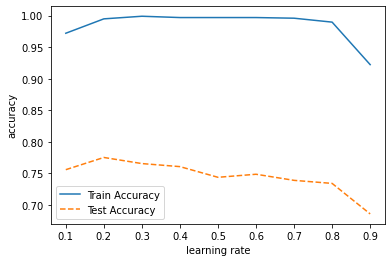

In [44]:
plt.plot(para_lr,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_lr,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("learning rate")
plt.legend()

lr = 0~0.2

In [45]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators = v_n_estimators,learning_rate  = 0.1,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimator"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [53]:
df_accuracy_n.round(3)

,Estimator,TrainAccuracy,TestAccuracy
0,10,0.789,0.708
1,20,0.839,0.732
2,30,0.878,0.720
3,40,0.905,0.739
4,50,0.921,0.744
5,60,0.934,0.754
6,70,0.941,0.749
7,80,0.958,0.756
8,90,0.965,0.756
9,100,0.972,0.756


ValueError: x and y must have same first dimension, but have shapes (15,) and (10,)

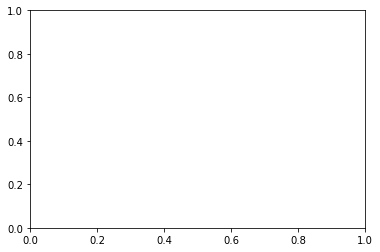

In [54]:
plt.plot(para_n_tree,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("estimator")
plt.legend()

In [48]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth = v_max_depth,n_estimators = 80, learning_rate = 0.1,random_state= 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy

In [49]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.730,0.700
1,2,0.874,0.758
2,3,0.958,0.756
3,4,0.992,0.780
4,5,1.000,0.783
5,6,1.000,0.795
6,7,1.000,0.790
7,8,1.000,0.783
8,9,1.000,0.802
9,10,1.000,0.790


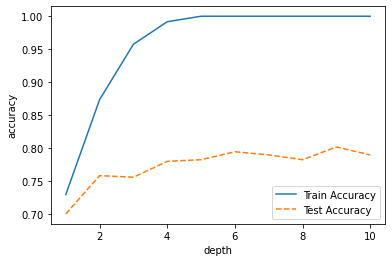

In [50]:
plt.plot(para_depth,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("depth")
plt.legend()

In [55]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                  max_depth = 6,
                                  n_estimators = 80,
                                  learning_rate = 0.1,
                                  random_state= 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [56]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.998,0.783
1,30,0.998,0.790
2,40,0.998,0.775
3,50,0.998,0.773
4,60,0.996,0.773
5,70,0.995,0.756
6,80,0.992,0.771
7,90,0.990,0.771
8,100,0.991,0.756


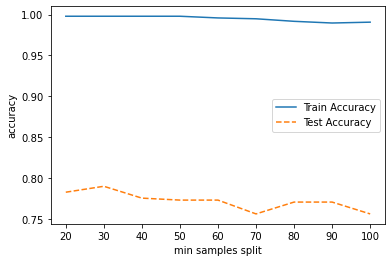

In [57]:
plt.plot(para_split,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("min samples split")
plt.legend()

In [58]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, 
                                  max_depth =6,
                                  n_estimators = 80, learning_rate= 0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [59]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,1.000,0.751
1,20,1.000,0.739
2,30,0.996,0.742
3,40,0.990,0.751
4,50,0.980,0.703
5,60,0.960,0.703
6,70,0.955,0.700
7,80,0.943,0.705
8,90,0.916,0.688
9,100,0.905,0.703


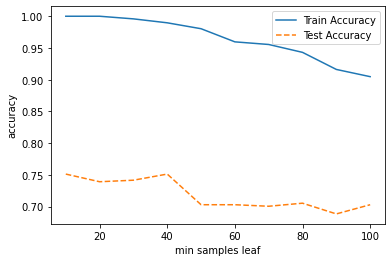

In [60]:
plt.plot(para_leaf,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("min samples leaf")
plt.legend()

In [75]:
gb_final=GradientBoostingClassifier(min_samples_leaf = 20, 
                                    max_depth = 3, 
                                    n_estimators = 100, 
                                    learning_rate= .1,random_state=1234)
gb_final.fit(df_train_x,df_train_y)
y_pred = gb_final.predict(df_test_x)
print("Accuracy on training set:{:3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.951346
Accuracy on test set:0.722222
Confusion matrix:
[[  3   6   4   0   0   0   0   0   0   0]
 [  3  45  19   1   0   0   0   0   0   0]
 [  0  10 117   9   3   3   0   0   0   0]
 [  0   1   7  70   6   3   2   1   0   0]
 [  0   0   5  10  28   4   3   1   0   0]
 [  0   0   1   5   3  14   2   0   0   0]
 [  0   0   0   0   0   0  19   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

          50      0.500     0.231     0.316        13
         150      0.726     0.662     0.692        68
         250      0.765     0.824     0.793       142
         350      0.737     0.778     0.757        90
         450      0.700     0.549     0.615        51
         550      0.560     0.560     0.560        25
         650      0.679     1.000     0.809        19
         750      0.600     1.000     0.750         3


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
v_feature_name = df_train_x.columns
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] =gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace = True)
df_importance.round(3)

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

In [ ]:
train_accuracy = [];test_accuracy=[]
para_hidden = [20* hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234)
#     nn = MLPClassifier(hidden_layer_sized= (v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_hidden.round(3)

In [ ]:
plt.plot(para_hidden,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("HiddenLayer")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn=MLPClassifier(activation = v_function,random_state = 1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_function.round(3)

In [ ]:
plt.plot(para_function,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel('Activation Function')
plt.legend()


In [ ]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

In [ ]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

In [ ]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(nn_scaled.score(df_scaled_test_x,df_test_y)))

In [ ]:
train_accuracy = []; test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_hidden.round(3)

In [ ]:
plt.plot(para_hidden,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Hidden Layer")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn=MLPClassifier(activation = v_function,hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_function.round(3)

In [ ]:
plt.plot(para_function,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_function,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Activation Function")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn=MLPClassifier(solver= v_solver, activation ='relu',hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["ActivationFunction"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_solver.round(3)

In [ ]:
plt.plot(para_solver,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_solver,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Solver")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn=MLPClassifier(batch_size= v_batch, solver = 'adam', activation = 'relu',hidden_layer_sizes=(80,80),random_state = 1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["MiniBatch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

In [ ]:
df_accuracy_batch.round(3)

In [ ]:
nn_final = MLPClassifier(hidden_layer_sizes = (40,40,40),
                         activation = 'relu',
                         solver ='adam',
                         batch_size = 100,
                         random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set:{:.3f}'.format(nn_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}\n'.format(nn_final.score(df_scaled_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

## XGboost

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [84]:
xgb = XGBClassifier(min_child_weight=20,
                    n_estimators=1000,
                    learning_rate = 0.3,
                    max_depth = 8,
                    random_state=1234)
xgb.fit(df_train_x,df_train_y)

/home/piai/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.chaju_id, credit_class, gender, agegroup, job, edu, dwell_type, house_type, marriage, income_home_grp, expenditure_grp, child_cd, flag_priv_biz_cd

In [ ]:

y_pred = xgb.predict(df_scaled_test_x)

print('Accuracy on training set:{:.3f}'.format(xgb.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}\n'.format(xgb.score(df_scaled_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

## catboost

In [78]:
from catboost import CatBoostClassifier, Pool

In [79]:
df_chaju = pd.read_csv('CreDB_chaju.csv', encoding='cp949')
df_chaju.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,99만원 이하,N,3,Y
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,100-199만원,N,2,N
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2,N


In [80]:
indexNames = df_chaju[df_chaju['income_ind_grp'] =='모름/무응답'].index
df_raw = df_chaju.drop(indexNames, inplace=False)

In [81]:
df_raw_x = df_raw.drop("income_ind_grp",axis = 1, inplace = False)
df_raw_y = df_raw["income_ind_grp"]
df_train_x, df_test_x, df_train_y,df_test_y  = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)

In [82]:
df_raw

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,100-199만원,N,2,N
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2,N
5,C-1006,C06,521,여성,59,50대,판매/서비스직,고등학교 졸업,자가,아파트,기타(이혼/별거/사별),300-399만원,100-199만원,99만원 이하,N,2,N
7,C-1008,C06,528,남성,35,30대,판매/서비스직,대학교 졸업,전세,아파트,기혼,500-599만원,300-399만원,99만원 이하,N,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,C-2994,C05,468,남성,42,40대,기능/노무직,전문대학 졸업,전세,아파트,기혼,300-399만원,300-399만원,100-199만원,N,2,N
1979,C-2996,C05,448,남성,41,40대,사무직,대학교 졸업,자가,단독주택,미혼,300-399만원,300-399만원,100-199만원,Y,0,N
1980,C-2997,C04,308,남성,37,30대,사무직,대학교 졸업,자가,아파트,기혼,300-399만원,300-399만원,100-199만원,N,2,N
1981,C-2998,C04,371,여성,50,50대,기능/노무직,고등학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,100-199만원,N,2,N
